# Gaussian-Process Vector Field Generator

<b>Code description:</b> 

This code generates divergence-free or curl-free vector fields. 

<b>Written and debugged by:</b> <br />

F. Zertuche, W. Banda-Barrag&aacute;n, H. D&eacute;nes, D. Ortiz

<b>Based on these papers:</b> 

Alvarez et al. 2012: "Kernels for Vector-Valued Functions: a Review"<br />
(https://arxiv.org/abs/1106.6251)

Wahlstrom et al. 2013: "Modeling magnetic fields using Gaussian Processes"<br />
(https://arxiv.org/abs/1106.6251)

Jidling et al. 2017: "Linearly constrained Gaussian Processes"<br />
(https://arxiv.org/pdf/1703.00787.pdf)

Macedo & Castro 2010: "Learning divergence-free and curl-free vector fields with matrix-valued kernels"<br />(http://preprint.impa.br/FullText/Macedo__Thu_Oct_21_16_38_10_BRDT_2010/macedo-MVRBFs.pdf)

<b>See also:</b> 

Busch et al. 2013: "Reconstruction of Divergence-Free Velocity Fields From Cine 3D Phase-Contrast Flow Measurements"<br />(https://onlinelibrary.wiley.com/doi/pdf/10.1002/mrm.24221)



## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Divergence-free kernel

In [2]:
def divFreeKern(x, y):
    '''
    input: 
        - x and y two row vectors in R^n.
    output: 
        - k(x, y) divergence-free kernel R^nxn matrix.
    '''
    
    n = len(x)
    d = x - y
    normd = -0.5 * np.sum(d**2)
    T1 = np.e**normd
    
    In = np.eye(n, n)
    v = np.reshape(d, (n, 1))
    vt = np.transpose(v)
    
    T2 = v.dot(vt)+((n-1)-np.sum(d**2))*(In)
    
    return(T1*T2)

## Curl-free kernel

In [3]:
def curlFreeKern(x, y):
    '''
    input: 
        - x and y two row vectors in R^n.
    output: 
        - k(x, y) curl-free kernel R^nxn matrix.
    '''
    
    n = len(x)
    d = x - y
    normd = -0.5 * np.sum(d**2)
    T1 = np.e**normd
    
    In = np.eye(n, n)
    v = np.reshape(d, (n, 1))
    vt = np.transpose(v)
    T2 = In - v.dot(vt)
    
    return(T1*T2)

## Generate a grid

In [4]:
d = 2
nxGrid = 50

x = np.linspace(0., 1., nxGrid)
y = np.linspace(0., 1., nxGrid)

L = []
for i in range(nxGrid):
    for j in range(nxGrid):
        L.append([x[i], y[j]])

X = np.reshape(L, (nxGrid*nxGrid, d))

## Create indices

Choose the kernel on the bottom of the cell to generate a vector field that is either divergence or curl free.

In [5]:
npoints = X.shape[0]

K = {}

for i in range(npoints):
    for j in range(npoints):
        
        if i < 10:
            ind_i = '000'+ str(i)
        if j < 10:
            ind_j = '000'+ str(j)
        if i > 9 and i < 100:
            ind_i = '00'+ str(i)
        if j > 9 and j < 100:
            ind_j = '00'+ str(j)
        if i > 99 and i < 1000:
            ind_i = '0'+ str(i)
        if j > 99 and j < 1000:
            ind_j = '0'+ str(j)
        if i > 999 and i < 10000:
            ind_i = str(i)
        if j > 999 and j < 10000:
            ind_j = str(j)            
            
        dicIndex = ind_i + ind_j 

        K[dicIndex] = divFreeKern(X[i], X[j])
        #K[dicIndex] = curlFreeKern(X[i], X[j])


## Create the covariance matrix (divFreeK)

We think that this section is not working how it should yet. We need to fix this!!!

In [6]:
# Assuming kernels are Ok, this section is the one that needs to get fixed!!

divFreeK = np.zeros((2*npoints, 2*npoints))

for k in K:
    i = int(k[:4])
    j = int(k[4:])
    
    iSM = np.where( (np.arange(0, 2*npoints) % npoints) == ( (i ) % npoints))[0]
    jSM = np.where( (np.arange(0, 2*npoints) % npoints) == ( (j ) % npoints))[0]

    SM = np.ix_(iSM, jSM)
    divFreeK[SM] = K[k]

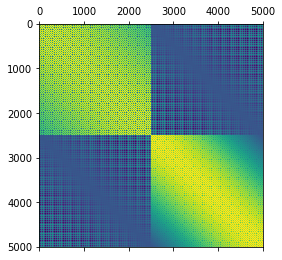

In [7]:
plt.matshow(divFreeK)
plt.show()

### Create the vector field/(s).

Z contains both components of the vector field

In [8]:
np.random.seed(1)

mu = np.zeros(2*npoints)
Z = np.random.multivariate_normal(mu, divFreeK, 2)

### Plot the created vector field (Z).

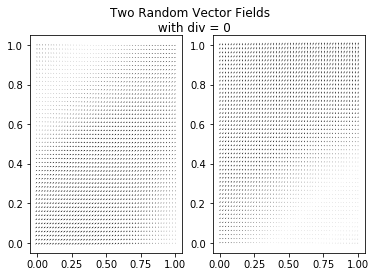

In [9]:
dx0 = Z[0][0:npoints]
dy0 = Z[0][npoints:2*npoints]

dx1 = Z[1][0:npoints]
dy1 = Z[1][npoints:2*npoints]

xx, yy = np.meshgrid(x, x)

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.quiver(xx, yy, dx0, dy0)
ax1.quiver(xx, yy, dx1, dy1)

plt.suptitle('Two Random Vector Fields \n with div = 0')
plt.show()

### Re-plot Z

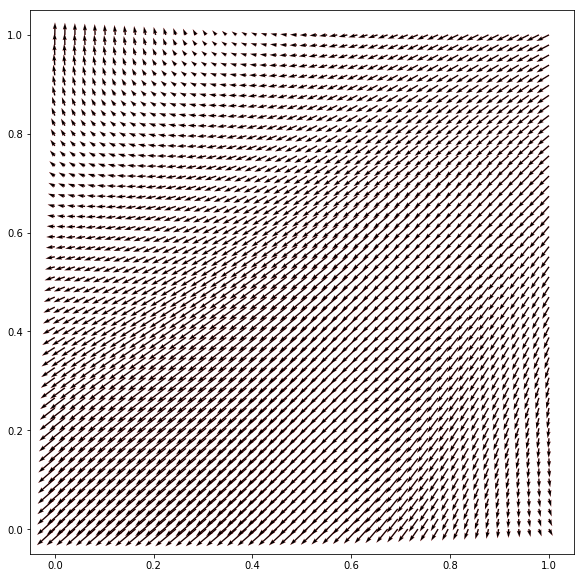

<Figure size 144x144 with 0 Axes>

In [10]:
dx0 = Z[0][0:npoints]  
dy0 = Z[0][npoints:2*npoints] 

plt.rcParams['figure.figsize'] = (10,10)

fig, ax0 = plt.subplots(1)
plt.figure(figsize=(2,2))

ax0.set(aspect=1)
ax0.quiver(xx, yy, dx0, dy0, edgecolor='r', linewidth=0.1, scale=50)

plt.show()

### Print components in separate text files

In [11]:
with open("divX.txt","w") as f:
    for t in Z[0][0:npoints]:
        print(t,file=f)

with open("divY.txt","w") as f:
    for t in Z[0][npoints:2*npoints]:
        print(t,file=f)